In [10]:
import os, glob
import pandas as pd
import numpy as np
import re
from IPython.display import *
import seaborn as sns
import matplotlib.pyplot as plt
from intrinio_api import *
%matplotlib inline

**Processing and merging tickers_*.csv**

In [176]:
def load_and_preprocess(f):
    classif = re.match('tickers_(\w+).csv', f).group(1)
    df = pd.read_csv(f)
    df = df.iloc[:,:-1]
    df['Classification'] = classif
    return df

In [178]:
dfs = [load_and_preprocess(f) for f in glob.glob('tickers_*.csv')]
df = pd.concat(dfs, ignore_index=True)

In [188]:
def get_merged(df):
    df_merged = df[df.Classification.str.slice(-3,None)=='cap']
    
    return df_merged

In [189]:
df_merged = get_merged(df)
df_merged.to_csv('tickers.csv', index=False)

In [2]:
df_merged = pd.read_csv('tickers.csv')

In [3]:
df_merged.head()

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Classification
0,TWOU,"2U, Inc.",83.20,4.777748e+09,NaN,2014.0,Technology,Computer Software: Prepackaged Software,https://www.nasdaq.com/symbol/twou,midcap
1,DDD,3D Systems Corporation,20.91,2.384373e+09,NaN,NaN,Technology,Computer Software: Prepackaged Software,https://www.nasdaq.com/symbol/ddd,midcap
2,JOBS,"51job, Inc.",71.41,2.601907e+09,36436171.0,2004.0,Technology,Diversified Commercial Services,https://www.nasdaq.com/symbol/jobs,midcap
3,EGHT,8x8 Inc,22.70,2.118407e+09,NaN,NaN,Public Utilities,Telecommunications Equipment,https://www.nasdaq.com/symbol/eght,midcap
4,EGHT,8x8 Inc,22.70,2.118407e+09,NaN,NaN,Public Utilities,Telecommunications Equipment,https://www.nasdaq.com/symbol/eght,midcap


**Sector Value Counts**

In [4]:
df_merged.Sector.value_counts()

Finance                  1040
Health Care               859
Consumer Services         819
Technology                625
Capital Goods             370
Energy                    313
Basic Industries          313
Public Utilities          268
Consumer Non-Durables     237
Miscellaneous             157
Consumer Durables         148
Transportation            123
Name: Sector, dtype: int64

In [6]:
tickers_df = df_merged

In [11]:
df_percentile_filtered = get_percentile_filtered_df()

In [12]:
df_percentile_filtered.Sector.value_counts()

Finance                  520
Health Care              430
Consumer Services        410
Technology               313
Capital Goods            185
Energy                   157
Basic Industries         157
Public Utilities         134
Consumer Non-Durables    119
Miscellaneous             79
Consumer Durables         74
Transportation            62
Name: Sector, dtype: int64

**Size by Sector**

In [202]:
size_by_sector = pd.crosstab(df_merged.Sector, df_merged.Classification)
size_by_sector.index.name = None

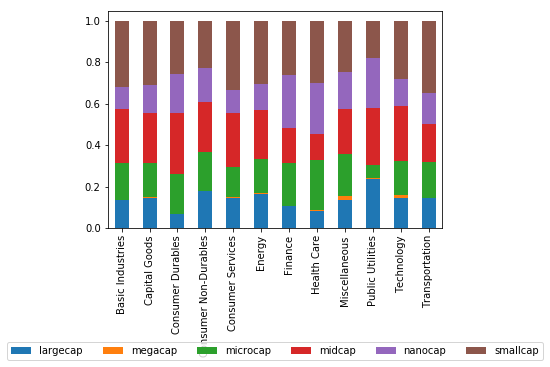

In [203]:
data = size_by_sector

data_perc = data.divide(data.sum(axis=1), axis=0)

ax = data_perc.plot(kind='bar', stacked=True)
ax.legend(loc=9, bbox_to_anchor=(.5,-.5), ncol=6)

**IPOYear by Sector**

In [206]:
df.groupby('Sector').IPOyear.describe().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Basic Industries,208,2008.56,9.12164,1973,2004,2012.5,2015,2018
Capital Goods,275,2004.38,10.01,1980,1996,2006,2014,2018
Consumer Durables,104,2005.13,9.82572,1983,1997,2006,2014,2018
Consumer Non-Durables,184,2005.72,10.6963,1972,1996,2010,2016,2018
Consumer Services,832,2008.01,8.90111,1981,2002,2012,2015,2018
Energy,304,2010.72,7.58685,1983,2007,2013,2017,2018
Finance,882,2012.36,7.7672,1981,2011,2016,2017,2018
Health Care,1012,2011.06,8.2121,1981,2010,2014,2016,2018
Miscellaneous,162,2008.75,7.99772,1987,2004,2011,2016,2018
